In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df_train = pd.read_excel("C:\Users\User\Desktop\train.xlsx")
df_test = pd.read_excel("C:\Users\User\Desktop\test.xlsx")

df_train 


SyntaxError: (unicode error) 'unicodeescape' codec can't decode bytes in position 2-3: truncated \UXXXXXXXX escape (3060873079.py, line 6)

In [13]:
df_train.describe()

,dt,Цена на арматуру
count,400,400.000000
mean,2018-11-01 12:00:00,39229.475000
min,2015-01-05 00:00:00,21000.000000
25%,2016-12-03 06:00:00,31075.000000
50%,2018-11-01 12:00:00,35450.000000
75%,2020-09-29 18:00:00,42000.000000
max,2022-08-29 00:00:00,79000.000000
std,NaN,13407.979668


Исходный график

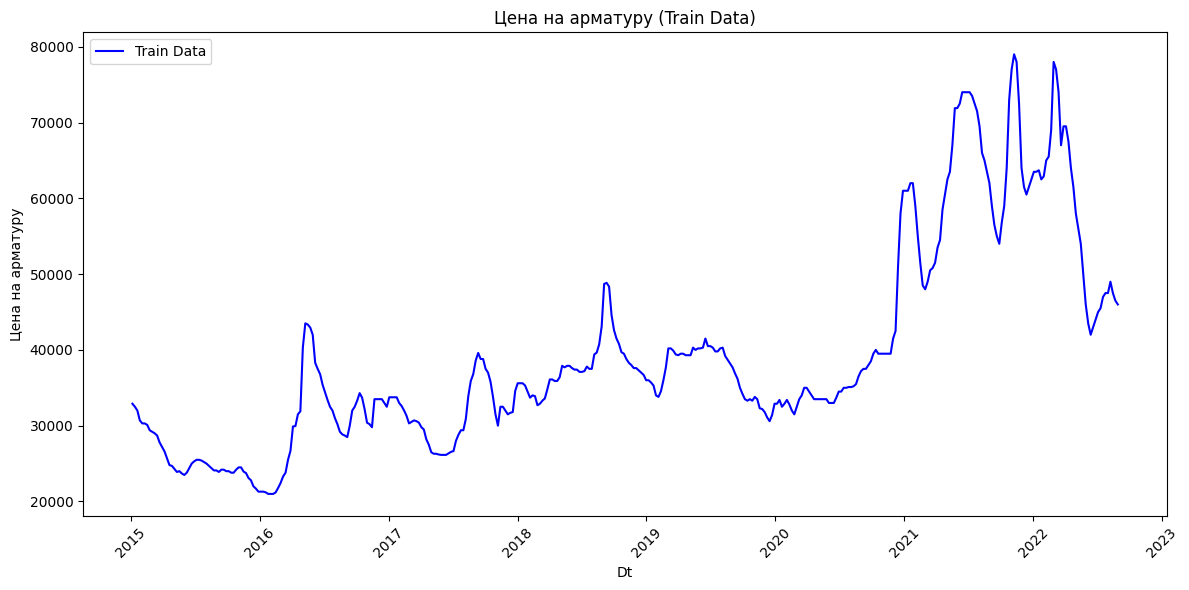

In [3]:
# Загрузка данных

df_train = pd.read_excel("C:\\Users\\2K\\Desktop\\train.xlsx")


# Преобразование столбца 'dt' в datetime
df_train['dt'] = pd.to_datetime(df_train['dt'])

# Визуализация цен
plt.figure(figsize=(12, 6))
plt.plot(df_train['dt'], df_train['Цена на арматуру'], label='Train Data', color='blue')
plt.xlabel('Dt')
plt.ylabel('Цена на арматуру')
plt.title('Цена на арматуру (Train Data)')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Разложение времянного ряда

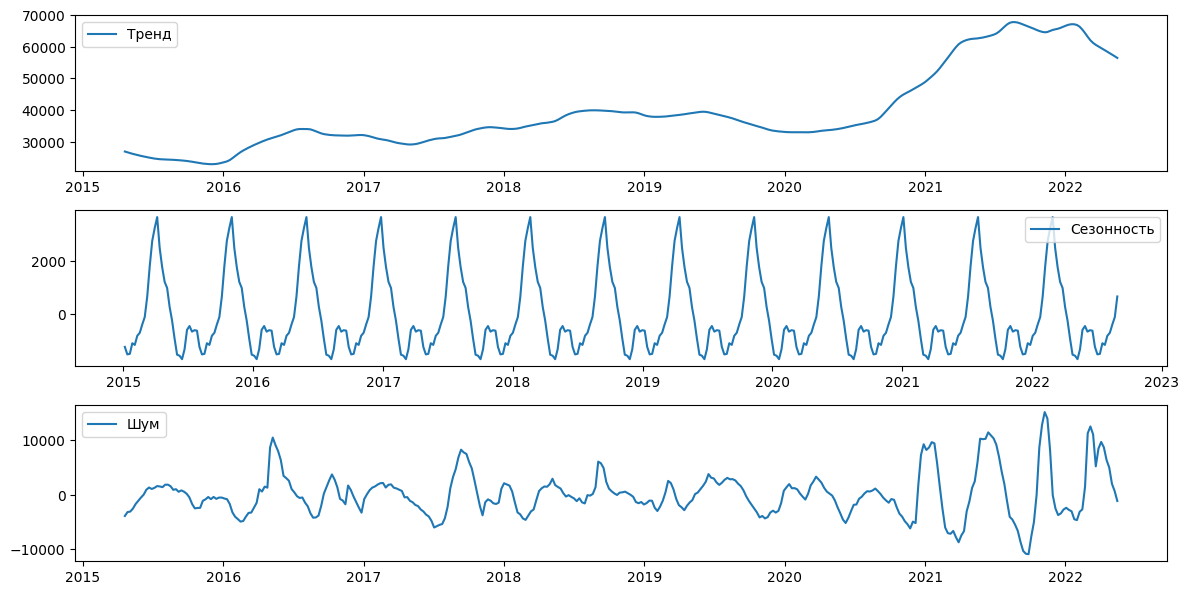

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Загрузка данных
df_train = pd.read_excel("C:\\Users\\2K\\Desktop\\train.xlsx", parse_dates=['dt'], index_col='dt')


# Разложение временного ряда
decomposition = seasonal_decompose(df_train['Цена на арматуру'], model='additive', period=30)


# Визуализация компонентов
plt.figure(figsize=(12, 6))
plt.subplot(311)
plt.plot(decomposition.trend, label='Тренд')
plt.legend()

plt.subplot(312)
plt.plot(decomposition.seasonal, label='Сезонность')
plt.legend()

plt.subplot(313)
plt.plot(decomposition.resid, label='Шум')
plt.legend()

plt.tight_layout()
plt.show()

Графики ACF и PACF

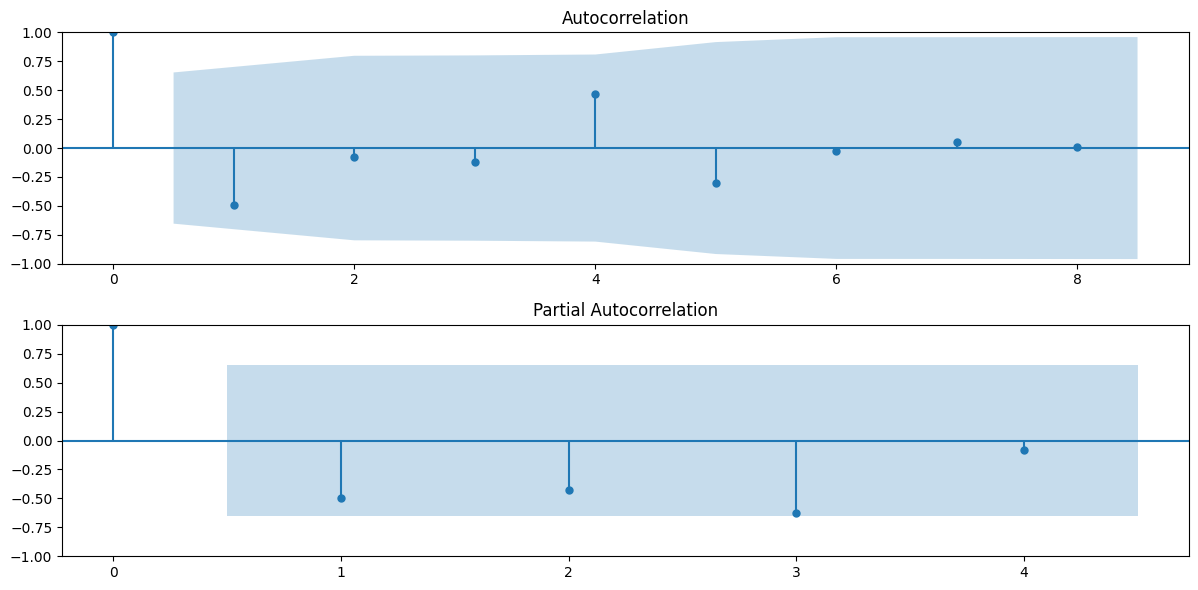

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

data = [10, 12, 15, 13, 16, 18, 20, 19, 22, 24] 
series = pd.Series(data)
series_diff = series.diff().dropna()

# 2. Построение графиков ACF и PACF ДЛЯ ДИФФЕРЕНЦИРОВАННОГО РЯДА
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 6))
plot_acf(series_diff, ax=ax1, lags=len(series_diff) - 1)
plot_pacf(series_diff, ax=ax2, lags=min(len(series_diff) // 2, len(series_diff) - 1), method='ywm')
plt.tight_layout()
plt.show()

Обучение модели Prophet

10:37:00 - cmdstanpy - INFO - Chain [1] start processing


Установлен cap: 86900.00


10:37:00 - cmdstanpy - INFO - Chain [1] done processing
  0%|          | 0/10 [00:00<?, ?it/s]10:37:00 - cmdstanpy - INFO - Chain [1] start processing
10:37:00 - cmdstanpy - INFO - Chain [1] done processing
 10%|█         | 1/10 [00:00<00:02,  3.68it/s]10:37:00 - cmdstanpy - INFO - Chain [1] start processing
10:37:00 - cmdstanpy - INFO - Chain [1] done processing
 20%|██        | 2/10 [00:00<00:02,  3.46it/s]10:37:00 - cmdstanpy - INFO - Chain [1] start processing
10:37:01 - cmdstanpy - INFO - Chain [1] done processing
 30%|███       | 3/10 [00:01<00:02,  2.82it/s]10:37:01 - cmdstanpy - INFO - Chain [1] start processing
10:37:01 - cmdstanpy - INFO - Chain [1] done processing
 40%|████      | 4/10 [00:01<00:01,  3.44it/s]10:37:01 - cmdstanpy - INFO - Chain [1] start processing
10:37:01 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 5/10 [00:01<00:01,  3.63it/s]10:37:01 - cmdstanpy - INFO - Chain [1] start processing
10:37:01 - cmdstanpy - INFO - Chain [1] done processin

     horizon          rmse      mape
0    36 days   7892.985615  0.145213
1    37 days   7829.039100  0.144880
2    38 days   7768.982709  0.144574
3    39 days   7838.358951  0.148956
4    40 days   7854.334454  0.150033
..       ...           ...       ...
325 361 days  21157.174279  0.341812
326 362 days  20800.723952  0.335423
327 363 days  20717.439800  0.337857
328 364 days  20481.622479  0.330075
329 365 days  20989.869164  0.338929

[330 rows x 3 columns]


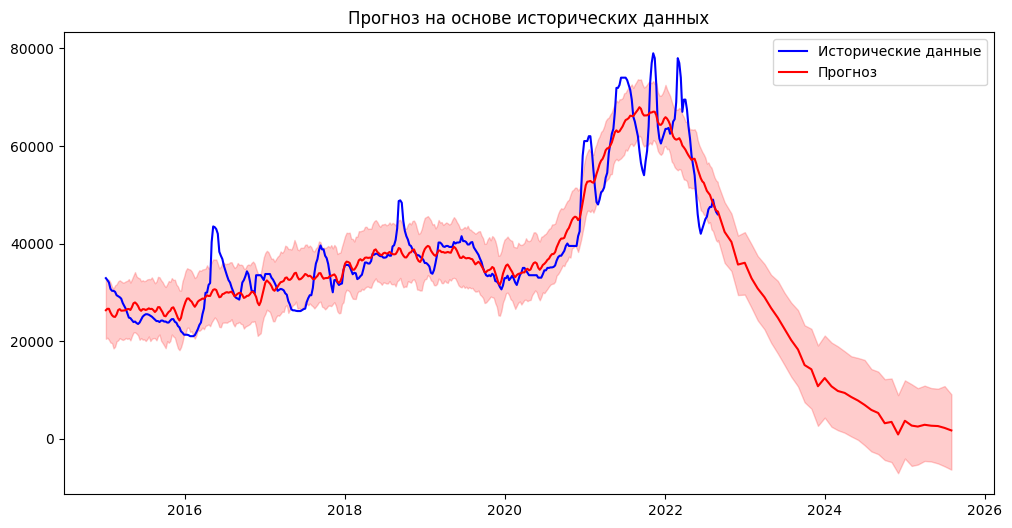

<Figure size 1200x600 with 0 Axes>

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from prophet import Prophet
from prophet.diagnostics import cross_validation, performance_metrics

# --- 1. Загрузка данных ---
data = pd.read_excel(r"C:\Users\User\Desktop\train.xlsx", parse_dates=['dt'])
data = data.rename(columns={'dt': 'ds', 'Цена на арматуру': 'y'})

# --- 2. Настройка параметра cap ---
cap = data['y'].max() * 1.1  # Максимальное значение + 10% буфера
print(f"Установлен cap: {cap:.2f}")

# Добавляем cap ко всем данным
data['cap'] = cap

# --- 3. Настройка модели Prophet ---
model = Prophet(
    growth='logistic',
    yearly_seasonality=True,
    seasonality_prior_scale=20,  # Увеличиваем для учета сезонности
    changepoint_prior_scale=0.5,  
    changepoint_range=0.9  
)

# Добавляем дополнительную сезонность (например, месячная)
model.add_seasonality(name='monthly', period=30.5, fourier_order=5)

# --- 4. Обучение модели Prophet ---
model.fit(data)

# --- 5. Кросс-валидация ---
# Разбиваем данные для кросс-валидации
df_cv = cross_validation(
    model,
    initial='730 days',  # Используем первые 2 года для начального обучения
    period='180 days',   # Делаем прогноз каждые 6 месяцев
    horizon='365 days'   # Горизонт прогнозирования — 1 год
)

# --- 6. Оценка точности прогноза ---
metrics = performance_metrics(df_cv)
print(metrics[['horizon', 'rmse', 'mape']])

# --- 7. Визуализация результатов ---
# Прогнозирование на весь период данных
future = model.make_future_dataframe(periods=36, freq='M')  # Прогноз на 3 года вперед
future['cap'] = cap
forecast = model.predict(future)

# Визуализация прогноза
plt.figure(figsize=(12, 6))
plt.plot(data['ds'], data['y'], label='Исторические данные', color='blue')
plt.plot(forecast['ds'], forecast['yhat'], label='Прогноз', color='red')
plt.fill_between(forecast['ds'], forecast['yhat_lower'], forecast['yhat_upper'], color='red', alpha=0.2)
plt.legend()
plt.title("Прогноз на основе исторических данных")
plt.show()

# --- 8. Визуализация ошибок кросс-валидации ---
plt.figure(figsize=(12, 6))

plt.tight_layout()
plt.show()